# Additional Exercise

Due: **12:00 18 July 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

**Student:** Vanessa Pinto

## Information

This additional exercise may be used for **one** of two reasons:

* make up for the attendance requirement (if you missed more than two tutorials), or
* replace lowest grade in exercises (mentioned to you via email)

For the latter, you may submit the solutions to this like any other exercise this year. For experience, it is advantageous to still use the following procedure.

If you need to make up for the attendance requirement, you must use a specific method of submission utilising [github](https://github.com/) and a makefile. If you are using Windows, please ensure you work either in [cygwin](https://www.cygwin.com/) or [Windows Subsystem for Linux](https://docs.microsoft.com/en-us/windows/wsl/install), since `make` does not work in Windows.

1. create a repository on github exclusively for this exercise
2. fully complete (or at least attempt) each question in a jupyter notebook
   * name it `[name]_additional_exercise_solution.ipynb`
3. restart and clear all notebook ouputs so it contains just the markdown and code cells (no plots or other outputs)
4. create a makefile to execute the notebook, compile to a pdf, and remove any temporary files
   * I should only need to run `$make` in order to build your submission
   * **do not** submit a compiled pdf of the solution
5. submit a file `[name].txt` containing the link to your git repository

Although make is a rather archaic tool, `make` is very useful to perform low-level compilation. It actually began as an easier method to compile C** and fortran code. Common compilation routines are identified using *suffix rules*. **For an additional 10%, write your own suffix rule to compile `.ipynb` files into `.pdf`.**

## `MakeFile`s

What a makefile does is simplify a workflow using terminal commands. As mentioned above, it is useful to compile documentation/code if changes where made in the source. One can in fact use this for newer formats such as IPython notebooks (`.ipynb` files).

A makefile typically goes in the top directory of your project. You can find an introduction to makefiles [here](https://makefiletutorial.com/). Basically how a makefile works is that you have a series of *targets* that execute a specific set of commands. For example, if your makefile contains,

```
info:
    @echo "This is a makefile."

command:
    @echo "This is a command."
```

> *Note:* Make will by default also print each command. Beginning the command with `@` suppresses this functionality.

you can make either target `info` or target `command`. Running `make info` in the terminal from the top directory will print `This is a makefile.` to the terminal. Likewise running `make command` will print `This is a command.` to the terminal. Not specifying a target will make the first target in the file (so `make info` is the same as `make` in this example). For this reason, it is customary to set the first target as the default workflow. If our makefile now contains,

```
all: info command

info:
    @echo "This is a makefile."

command:
    @echo "Some commands to execute:"
    echo "..."
    @echo "It has now completed."
```

running `make` from the terminal will print,

```
This is a makefile.
Some commands to execute:
echo "..."
...
It has now completed.
```

Each target can run multiple commands, but each line is run in a separate subshell. This means if you want to string together commands (for example if you need to change directories), you have to write them in one line as `command 1 ; command 2 ; ...`.

This should be most everything you need to write your own makefile. Please contact a TA if you run into any major issues.

> Ensure each command is indented with a **tab** character (not *space* characters). This is one of the finicky aspects of using a makefile...

> Note that linux operating systems use GNU make with `bash` or `dash` as a shell. Macintosh products typically use `zsh`.

## Working with a notebook from the terminal

Most operations you can perform on the notebook are available from the terminal. The command to work with notebooks is [nbconvert](https://nbconvert.readthedocs.io/en/latest/usage.html). This can convert between file types, depending on your needs. For example, executing a notebook from the terminal can be done using,

```
jupyter nbconvert --to notebook --execute notebook.ipynb
```

You can see a list of the available format types in the aforementioned link.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skewnorm
from sklearn import metrics
from sklearn import linear_model
import statsmodels.api as sm
import math
from scipy import interpolate
from scipy.interpolate import UnivariateSpline

## the *Hipparcos* catalogue

*Hipparcos* (HIgh Precision PARallax COllecting Satelite) was a very important stellar survey mission between 1989 and 1993. It was the first astrometric mission of its kind, and it's precise observations allowed for unprecedented astrometrical calculations within the Milky Way. The observations of faint stars have since been (*vastly*) improved upon by the current *Gaia* mission, though the brightest stars were still most accurately observed by *Hipparcos*.

The following examples will utilise a subset of a more recent reduction of the *Hipparcos* [data](https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/311/hip2) ([van Leeuwen 2007](https://arxiv.org/pdf/0708.1752.pdf)) to emphasize how work with astronomical data within python, and hopefully teach a thing or two about stellar populations. The dataset we use are the stars with five-parameter astrometric solutions, meaning the solutions have been constrained for RA and DEC, proper motion in RA and DEC, and parallax. We will also highlight some of the features of various python packages so you can decide which method you prefer.

This dataset has 15 columns, with the titles as a comment in the first line. The columns (and units) are,

 - name in the *Hipparcos* catalog HIP
 - right ascentions RA ($\mathrm{RA}$; degrees)
 - error in right ascention sigma_RA ($\sigma_\mathrm{RA}$; milli-arcseconds)
 - declination DEC ($\mathrm{DEC}$; degrees)
 - error in declination sigma_DEC ($\sigma_\mathrm{DEC}$; milli-arcseconds)
 - parallax PLX ($\varpi$; in milli-arcseconds)
 - error in parallax sigma_PLX ($\sigma_\mathrm{\varpi}$; in milli-arcseconds)
 - right ascention proper motion PM_RA ($\mu_\mathrm{RA}$; milli-arcseconds per year)
 - error in right ascention proper motion sigma_PM_RA ($\sigma_{\mu, \mathrm{RA}}$; milli-arcseconds per year)
 - declination proper motion PM_DEC ($\mu_\mathrm{DEC}$; milli-arcseconds per year)
 - error in declination proper motion sigma_PM_DEC ($\sigma_{\mu, \mathrm{DEC}}$; milli-arcseconds per year)
 - *Hipparcos* magnitude Hp (dex)
   - *aka* V-band magnitude
 - error in magnitude sigma_Hp (dex)
 - B-V color (dex)
 - error in B-V color sigma_B-V (dex)
 - V-I color (dex)

In [2]:
# get the data from the files 
data1 = pd.read_csv('BC_hipparcos.csv')
data2 = pd.read_csv('hipparcos2.csv')
data2

,# HIP,RA,sigma_RA,DEC,sigma_DEC,PLX,sigma_PLX,PM_RA,sigma_PM_RA,PM_DEC,sigma_PM_DEC,Hp,sigma_Hp,B-V,sigma_B-V,V-I
0,HIP 1,0.000912,1.29,1.089013,0.66,4.55,1.33,-4.55,1.25,-1.19,0.75,9.2043,0.0020,0.482,0.025,0.55
1,HIP 2,0.003797,0.95,-19.498837,0.53,20.85,1.13,182.88,1.22,-1.31,0.66,9.4017,0.0017,0.999,0.002,1.04
2,HIP 3,0.005008,0.31,38.859286,0.21,2.26,0.36,4.27,0.34,-3.43,0.27,6.6081,0.0006,-0.019,0.004,0.00
3,HIP 4,0.008382,0.40,-51.893546,0.47,7.45,0.77,62.64,0.51,0.19,0.51,8.1498,0.0011,0.370,0.009,0.43
4,HIP 5,0.009965,0.55,-40.591224,0.50,3.88,0.95,1.89,0.58,8.06,0.64,8.7077,0.0018,0.902,0.013,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117950,HIP 120313,206.398693,3.77,17.742441,4.04,5.36,2.06,-4.61,3.09,-3.18,2.88,9.5172,0.0029,1.430,0.020,1.40
117951,HIP 120401,119.382277,7.23,-60.630932,7.32,1.82,2.68,-7.62,6.90,21.56,6.91,9.2339,0.0084,0.104,0.007,0.12
117952,HIP 120402,119.448662,4.48,-60.609727,4.53,2.98,1.46,-7.25,4.14,4.47,4.25,8.3699,0.0030,-0.022,0.010,0.00
117953,HIP 120403,119.454927,4.69,-60.683660,4.70,0.85,1.94,-8.50,4.31,15.81,4.53,8.5790,0.0039,0.061,0.007,0.07


### Calculating distance

A major benefit to precise astrometric observations is an accurate estimate of the parallax. This allows us to calculate the distance to each star and it reveal the structure of the Milky Way.

Begin by using the parallax ($\varpi$) to calculate the distance in parsecs (pc) to each star. It is important to remember that the parallax has units of milli-arcseconds (mas), so the distance to the star is calculated by:

$$ d = 1000 \Big(\frac{\mathrm{mas}}{\varpi}\Big) \ \mathrm{pc} $$

Use this formula to find some interesting trends in the *Hipparcos* catalog. Are there any issues with the dataset? **5 points**

> *Note:* Each degree contains 60 arcminutes, which each contain 60 arcseconds, so there are 3 600 000 milli-arcseconds in 1 degree.

> *Note:* The Milky Way has a diameter of $\sim 40~000$ pc and Earth is located at a radius of $\sim 8~000$ pc.

In [3]:
#define the parallax array 
px = data2['PLX']

In [4]:
#set up a distance array and calculate it for each value 
distance = []
for i in range(len(px)): 
    d = 1000*(1/px[i])
    distance = np.append(distance,d)

C:\Users\VANESSA\AppData\Local\Temp/ipykernel_12064/2201876270.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  d = 1000*(1/px[i])


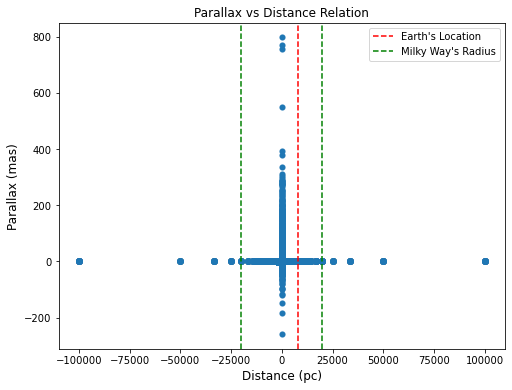

In [5]:
#plot the relation of the parallax and distance along with the 
#notes of Earth's location and the Milky Way radius 

plt.figure(figsize=(8,6))

plt.scatter(distance, px, linewidths = 0.1)

plt.axvline(x = 8000, color = 'r', linestyle = '--', label = "Earth's Location")


plt.axvline(x = 20000, color = 'g', linestyle = '--', label = "Milky Way's Radius")
plt.axvline(x = -20000, color = 'g', linestyle = '--')


plt.legend()

plt.title('Parallax vs Distance Relation')
plt.ylabel('Parallax (mas)', fontsize = 12)
plt.xlabel('Distance (pc)', fontsize =12)

plt.show()

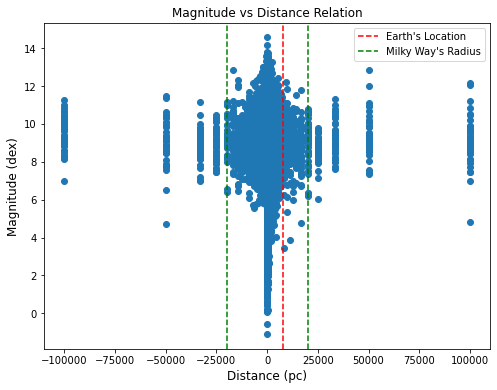

In [6]:
#plot the relation of the magnitude and distance along with the 
#notes of Earth's location and the Milky Way radius 

plt.figure(figsize=(8,6))
plt.scatter(distance, data2['Hp'])


plt.axvline(x = 8000, color = 'r', linestyle = '--', label = "Earth's Location")

plt.axvline(x = 20000, color = 'g', linestyle = '--', label = "Milky Way's Radius")
plt.axvline(x = -20000, color = 'g', linestyle = '--')


plt.legend()

plt.title('Magnitude vs Distance Relation')
plt.ylabel('Magnitude (dex)', fontsize = 12)
plt.xlabel('Distance (pc)', fontsize =12)




plt.show()

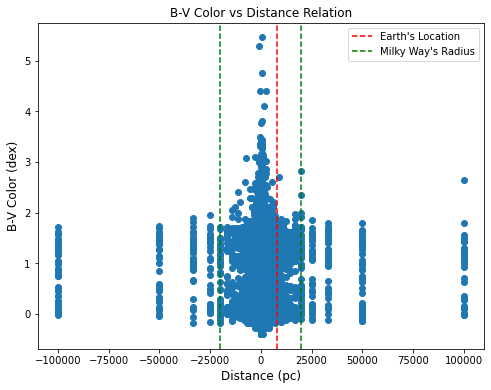

In [7]:
#plot the relation of the B-V color and distance along with the 
#notes of Earth's location and the Milky Way radius 

plt.figure(figsize=(8,6))
plt.scatter(distance, data2['B-V'])


plt.axvline(x = 8000, color = 'r', linestyle = '--', label = "Earth's Location")

plt.axvline(x = 20000, color = 'g', linestyle = '--', label = "Milky Way's Radius")
plt.axvline(x = -20000, color = 'g', linestyle = '--')


plt.legend()

plt.title('B-V Color vs Distance Relation')
plt.ylabel('B-V Color (dex)', fontsize = 12)
plt.xlabel('Distance (pc)', fontsize =12)




plt.show()

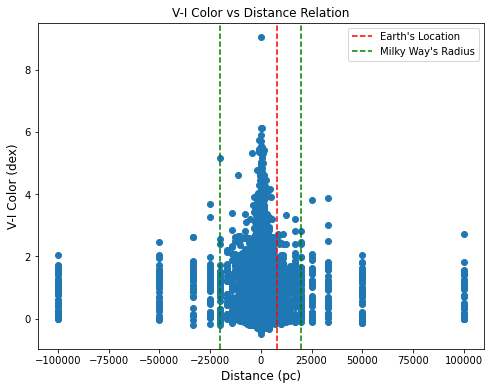

In [8]:
#plot the relation of the V-I color and distance along with the 
#notes of Earth's location and the Milky Way radius 

plt.figure(figsize=(8,6))
plt.scatter(distance, data2['V-I'])


plt.axvline(x = 8000, color = 'r', linestyle = '--', label = "Earth's Location")

plt.axvline(x = 20000, color = 'g', linestyle = '--', label = "Milky Way's Radius")
plt.axvline(x = -20000, color = 'g', linestyle = '--')


plt.legend()

plt.title('V-I Color vs Distance Relation')
plt.ylabel('V-I Color (dex)', fontsize = 12)
plt.xlabel('Distance (pc)', fontsize =12)



plt.show()

By plotting distance with the different parameters from the data set, including the parallax and several calculations of magnitude, we see for all of the plots involving magnitudes there is the main concentration of data points around the central distance which would correspond to stars in the Milky Way as this concentration is limited by the distance that defines the radius of the galaxy. We also see clumps of data points scattered across different values of magnitudes but yet they seem to share the same distance value. 
In the plot of the parallax vs distance, a similar relation is somewhat visible although in this case all of the data points seem to limit to the zero lines in both axes. However, we can still see a more dense concentration within the Milky Way radius. 

Can you find what is the most common distance to a star? What is the standard deviation of this value? What can you determine from these values? **5 points**

In [9]:
#define the mode for the distance array 
common = stats.mode(distance)
common

ModeResult(mode=array([347.22222222]), count=array([190]))

In [10]:
std_common = np.std(common)
std_common

78.61111111111111

In [11]:
print('The most common distance is 347.222222 with standard deviation ',std_common)

The most common distance is 347.222222 with standard deviation  78.61111111111111


These values reinforce the previous conclusion that the main concentration of stars is around the central distance and is included in the Milky Way galaxy. 

### Utilising error

Error is a major aspect of observational data, since there are so many sources (instrumentational and physical) to consider. Following the procedure of van Leeuwen (2007), let us examine the error in parallax and its trends in our dataset. Relative error $\big(\frac{\sigma_q}{q}\big)$ is an important metric when our data spans multiple orders of magnitude. What is the distribution of relative error in parallax (you may want to make y log-spaced)? What does this mean in terms of *Hipparcos*' precision? **10 points**

In [12]:
#define the parallax std array from the data set 
std_px = np.array(data2['sigma_PLX'])

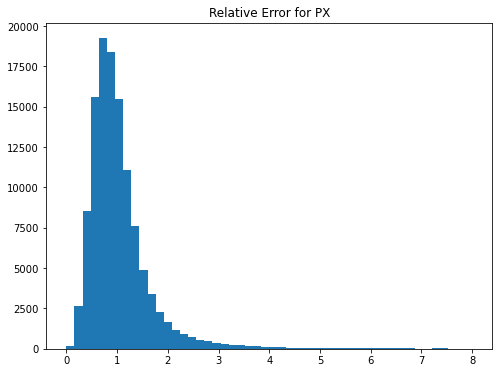

In [13]:
#check to see how the parallax std array looks in a historgram 
plt.figure(figsize=(8,6))


plt.hist(std_px, bins = 50, range = [0,8])

plt.title('Relative Error for PX')


plt.show()

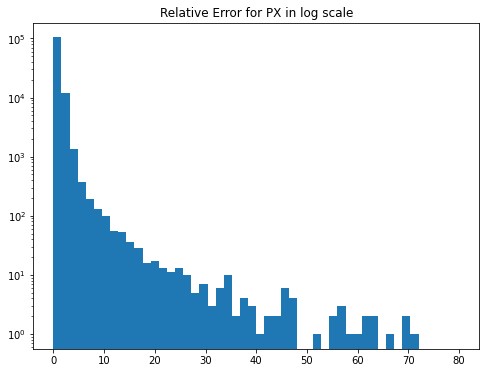

In [14]:
#plot the parallax std in a log-log plot
plt.figure(figsize=(8,6))

plt.hist(std_px, bins = 50, log = True, range = [0,80])


plt.title('Relative Error for PX in log scale')
plt.show()

From the log graph, we can see that the distribution is skewed where the highest concentration is towards the zero value. This is a good indicator since the majority of values have a low standard deviation, however, there are still a significant amount of values with very high standard deviation. This indicates that the precision of the Hipparcos can be improved. 

The error in parallax is typically related to the brightness of the star (from the statistics of photon counts). A view of this trend can be seen below (keeping the relative parallax error below 5%; similar to Figure 11 in van Leewen 2007). Can you find a fit to this relation, including error? **10 points**

![relative error](./hipparcos_plx_err.png)

In [15]:
#define the magnitude from the data set as well as the log values 
mag = np.array(data2['Hp'])
log_stdpx = np.log(std_px)
log_mag = np.log(mag)

C:\Users\VANESSA\AppData\Local\Temp/ipykernel_12064/3814708332.py:4: RuntimeWarning: invalid value encountered in log
  log_mag = np.log(mag)


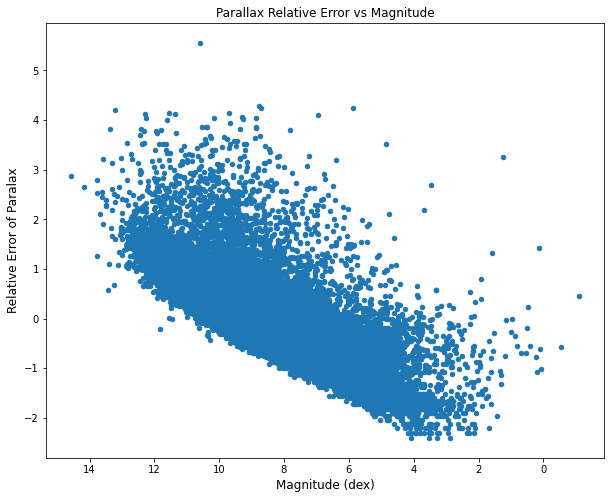

In [16]:
#plot the magnitude agains the log of the parallax std to take a look at the data 
plt.figure(figsize=(10,8))

plt.scatter(mag, log_stdpx, s = 20)
plt.gca().invert_xaxis()

plt.title('Parallax Relative Error vs Magnitude')
plt.ylabel('Relative Error of Paralax', fontsize = 12)
plt.xlabel('Magnitude (dex)', fontsize =12)



plt.show()

In [17]:
#perform linear regression on the arrays and get the parameters 
slope, intercept, r_value, p_value, std_err = stats.linregress(mag,log_stdpx)

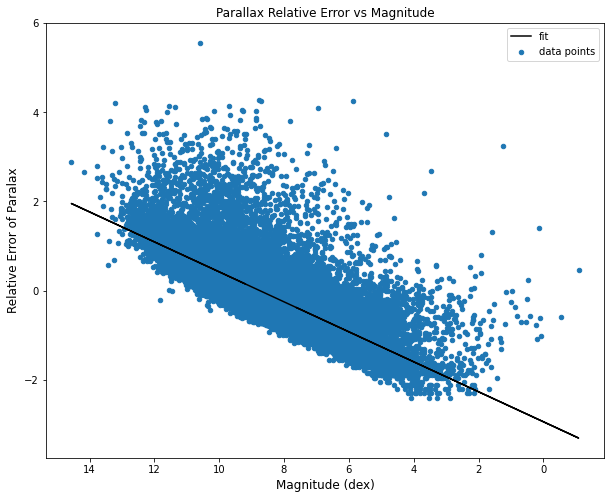

In [18]:
#plot the linear regression fit into the original plot 
plt.figure(figsize=(10,8))

plt.scatter(mag, log_stdpx, s = 20, label = 'data points')
plt.plot(mag, slope*mag + intercept, c ='k', label = 'fit')
plt.gca().invert_xaxis()

plt.title('Parallax Relative Error vs Magnitude')
plt.ylabel('Relative Error of Paralax', fontsize = 12)
plt.xlabel('Magnitude (dex)', fontsize =12)


plt.legend()
plt.show()

In [19]:
print('The standard error of the fit is: ',std_err)

The standard error of the fit is:  0.0007483418369865184


Can you plot a histogram of the relative errors in $\mathrm{RA}, \ \mathrm{DEC},$ and $\mathrm{PLX}$ in a single figure? **10 points**

In [20]:
#define the arrays for the std of both of the coordinates 
ra_std = data2['sigma_RA']
dec_std = data2['sigma_DEC']

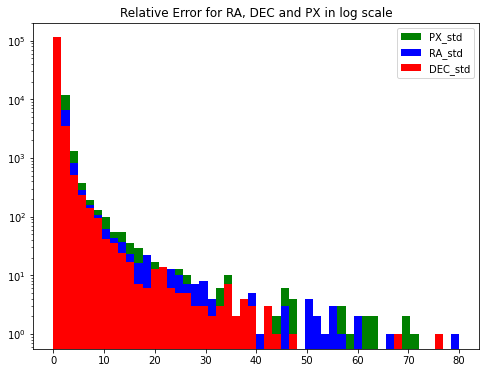

In [21]:
#plot all three of the standard deviations in a log histogram
plt.figure(figsize=(8,6))

plt.hist(std_px, bins = 50, range = [0,80], log = True, color = 'g', label = 'PX_std')
plt.hist(ra_std, bins=50, range=[0,80], log=True, color = 'b', label = 'RA_std')
plt.hist(dec_std, bins=50, range=[0,80], log=True, color = 'r', label = 'DEC_std')

plt.title('Relative Error for RA, DEC and PX in log scale')

plt.legend()
plt.show()

### Hertzsprung-Russell diagrams

#### Observational

Before calculating any intrinsic stellar properties from the observations, it is typically useful to plot a diagram of what you *observe*. (Observed here means the most basic properties that can be determined from the data. If you want to be pedantic, then you might suggest that the values in this table are not what is actually observed, but a reduction of the observed photon counts.) For this purpose we should plot a Hertzsprung-Russel diagram (HRD) to reveal the different stellar types. It is important not only to remember that a HRD has colour (B-V) on the x-axis and magnitude (Hp) on the y-axis, but also that the y-axis is reversed (the perks of using an antiquated unit). **5 points**

In [22]:
#define the array for the BV magnitude and its respective std
BV = np.array(data2['B-V'])
BV_std = np.array(data2['sigma_B-V'])

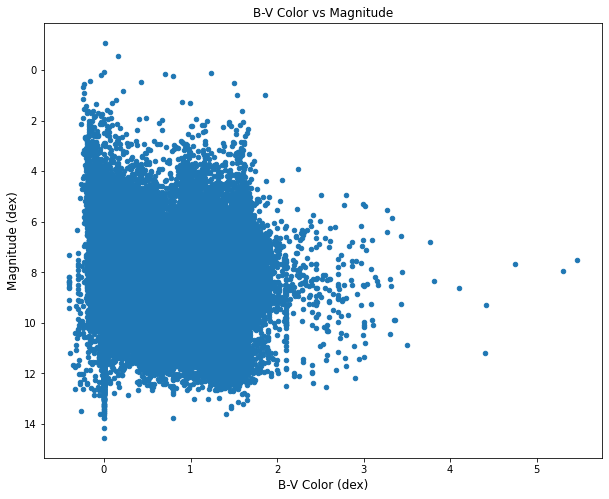

In [23]:
#plot the BV color vs the magnitude 
plt.figure(figsize=(10,8))

plt.scatter(BV,mag, s = 20)
plt.gca().invert_yaxis()

plt.title('B-V Color vs Magnitude')
plt.ylabel('Magnitude (dex)', fontsize = 12)
plt.xlabel('B-V Color (dex)', fontsize =12)



plt.show()

From this graph is difficult to make any conclusions based on the data points. There are no visible trends in this graph, besides the big concentration of points around the zero vertical line. 

What do you see?

If you use the magnitude given in `hipparcos2.csv`, you might have a little difficulty determining the different regions of an HR diagram. One reason for this is that it is an apparent magnitude, so these results do not take into account reddening or extinction. Another issue, however, is that we don't filter the results that have a lot of error. Try plotting it again while limiting the relative parallax error to <20% and the color error to 5 mag. **5 points**

Text(0.5, 0, 'B-V Color (dex)')

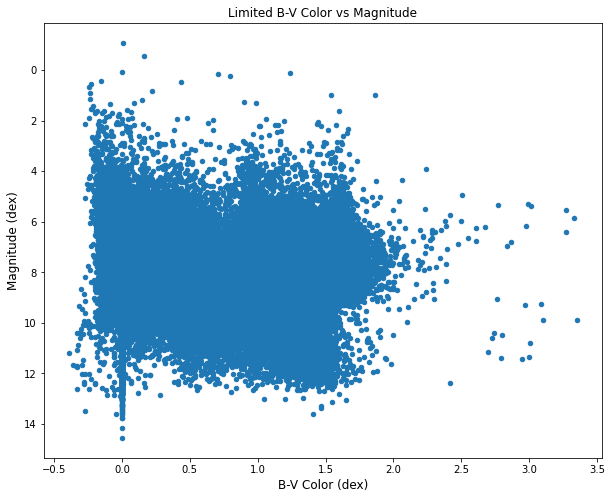

In [24]:
#plot the BV and the magnitude one more time but now these values will be
#limited to where BV std < 0.05 and the parallax std < 0.20
plt.figure(figsize=(10,8))

plt.scatter(BV[np.where(std_px<0.20) and (BV_std<0.05)],mag[np.where(std_px<0.20)and(BV_std<0.05)], s = 20)
plt.gca().invert_yaxis()

plt.title('Limited B-V Color vs Magnitude')
plt.ylabel('Magnitude (dex)', fontsize = 12)
plt.xlabel('B-V Color (dex)', fontsize =12)


One trait now looks more prominent, and that is the suspiciously high number of stars with $ B-V = 0 $. This is called an artefact, and it is a result of some bad data or sloppy reduction. Since the author of this reduction is quite renowned in the community, the issue most likely lies with bad data for these stars. For the rest of the exercise, you may filter-out star with $B-V = 0$.

Now try plotting the HRD in terms of the intrinsic absolute magnitude, $ M_{Hp} $ (you should get something similar in shape to [this](https://www.cosmos.esa.int/documents/532822/573165/f3_5_005.pdf/90951100-6586-4ba7-a042-784f5845a279)). **Try also with the other colour $V-I$**. Remember that the absolute magnitude can be calculated by the formula:

$$
M_\mathrm{Hp} = m_\mathrm{Hp} - 5 \ \mathrm{log}_\mathrm{10}\Big(\frac{d}{pc}\Big) + 5
$$

This plot has a bit of an issue where there are many points plotted ontop of each other. Instead, see if you can plot the number density in a 2D histogram of of the following ways **10 points**

* bin the data in steps of 0.05 mag in $M_{Hp}$ and 0.01 mag in $B-V$, with the number density in the color bar. You might find the function `scipy.stats.binned_statistic_2d()` useful.
* Utilise the `hexbin` routine with an adequate choice of binning

In [25]:
#define the function to calculate the absolute magnitue by taking 
#the distance and the magnitude 
def abs_magnitude(mag,dist):
    log = (math.log10(dist)*5)
    abs_mag = mag - log + 5 
    return abs_mag

In [26]:
#since the log of distance is taken, the values less than zero are filtered
#out from both of the arrays 
dist2 = distance[np.where(distance>0)]
mag2 = mag[np.where(distance>0)]
BV3 = BV[np.where(distance>0)]

In [27]:
#calculate de absolute magnitude for each value in the array 
abs_mag = []
for i in range(len(mag2)):
    a = abs_magnitude(mag2[i],dist2[i])
    abs_mag = np.append(a, abs_mag)

In [28]:
abs_mag

array([-1.13659999, -1.77390537,  0.74098132, ..., -1.6213578 ,
        5.9972303 ,  2.49435698])

In [29]:
BV2 = BV[np.where(BV!=0)]

Text(0.5, 0, 'B-V Color (dex)')

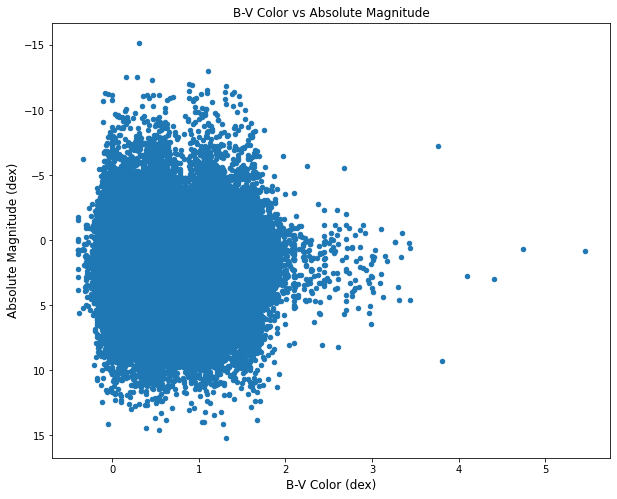

In [30]:
#plot the respective BV values and the matching absolute magnitude array 

plt.figure(figsize=(10,8))

plt.scatter(BV3,abs_mag, s = 20)
plt.gca().invert_yaxis()

plt.title('B-V Color vs Absolute Magnitude')
plt.ylabel('Absolute Magnitude (dex)', fontsize = 12)
plt.xlabel('B-V Color (dex)', fontsize =12)


In [31]:
#define the V-I color array from the data set
VI = np.array(data2['V-I'])
VI2 = VI[np.where(distance>0)]

Text(0.5, 0, 'V-I Color (dex)')

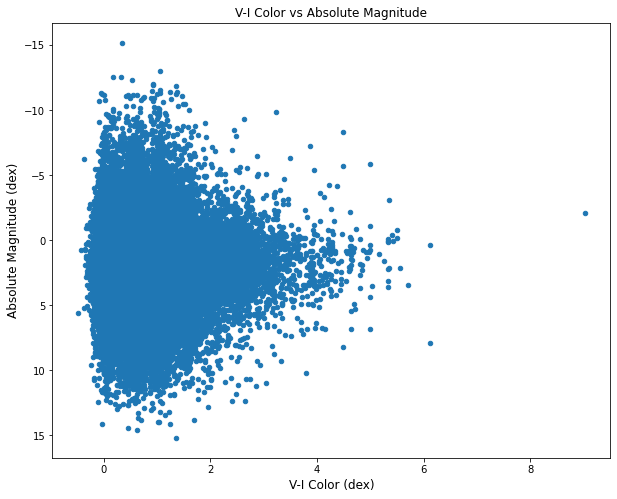

In [32]:
#plot the respective VI values and the matching absolute magnitude array 

plt.figure(figsize=(10,8))

plt.scatter(VI2,abs_mag, s = 20)
plt.gca().invert_yaxis()

plt.title('V-I Color vs Absolute Magnitude')
plt.ylabel('Absolute Magnitude (dex)', fontsize = 12)
plt.xlabel('V-I Color (dex)', fontsize =12)

In [33]:
#we can see that some of the values in the absolute magnitude array correspond 
#to infinity and need to be filtered out 
abs_mag[np.isfinite(abs_mag)== False]

array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf])

Text(0.5, 1.0, '2D Histogram of B-V Color and Absolute Magnitude')

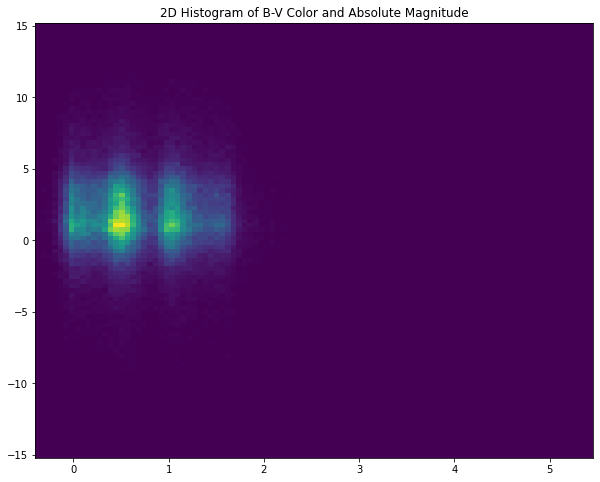

In [34]:
#a 2d histogram is plotted where the infinite values are exluded 
plt.figure(figsize=(10,8)) 

plt.hist2d(BV3[np.where(np.isfinite(abs_mag)!= False)],abs_mag[np.where(np.isfinite(abs_mag)!= False)], bins = 100)

plt.title('2D Histogram of B-V Color and Absolute Magnitude')

Very broadly we say that the features observed here are the main sequence (diagonal feature) and red clump (roughly spherical feature). Fit a line to the main sequence. Approximate the percentage of stars in the main sequence compared to the percentage in the red clump. **10 points**

> *Note:* This will not add up to 100%.

#### Theoretical

For theorists it is more illuminating to plot diagrams of intrinsic properties. This makes it easier to relate the observations to population synthesis or evolutionary models. Getting to these intrinsic stellar properties from our observations is typically quite involved, requiring some (not so trivial) estimate of the dust extinction and attenuation along the line of sight. We will assume there is no dust extinction for a very basic example.

A star's colour can be used to calculate its effective (surface) temperature. Disregarding any reddenning, we can estimate it using the formula ([Ballesteros 2012](https://arxiv.org/pdf/1201.1809.pdf)):

$$
T_\mathrm{eff} = 4600 \ \Big( \frac{1}{0.92(B-V)+0.62} + \frac{1}{0.92(B-V)+1.7} \Big) \ \mathrm{K}
$$

Luminosity is the intrinsic analog of magnitude. To put it in solar units, we need to use the absolute bolometric magnitude of the Sun ($M_\odot=4.74$) with the observed star's bolometric magnitude and extinction. Since our absolute magnitudes are in the V band, we will have to add a bolometric correction ($BC_\mathrm{Hp}$) to convert to the bolometric magnitude. Thus we have too many unknowns for our to make an accurate approximation. Current missions (ie. *Gaia*) get around this by utilising extremely-randomised trees, a regression method beyond the scope of this simple introduction. We will **not** use regression, but instead use an extremely-simplified approach where we neglect extinction and interpolate the bolometric correction (from `BC_hipparcos.csv`; [Masana et al. 2008](https://arxiv.org/pdf/astro-ph/0601049.pdf)) to get the formula:

$$
-2.5 \ \mathrm{log_{10}} \Big( \frac{L}{L_\odot} \Big) = M_\mathrm{Hp} + BC_\mathrm{Hp}(T_\mathrm{eff}) - M_\odot
$$

Finally, the stellar radii can be calculated using the standard blackbody relation:

$$
L = \Big( \frac{R}{R_\odot} \Big)^2 \Big( \frac{T_\mathrm{eff}}{T_{\mathrm{eff},\odot}} \Big)^4 \ L_\odot
$$

It might also help you to know the solar units: $L_\odot=3.828*10^{26} \ \mathrm{W}$, $R_\odot=6.956*10^8 \ \mathrm{m}$, $T_\odot=5780 \ \mathrm{K}$.

Perform a spline fit of the bolometric correction data. Correctly interpolate the BC and utilise the equations to create a 2D histogram (or hexbin plot) of $L$ as a function of $T_\mathrm{eff}$. **10 points**

> *hint:* Use units of $L_\odot$ and K.

> *hint:* Technically this fit is only valid for $T_\mathrm{eff} \in [3300, 8000]$ K.

In [44]:
#define the given solar constant values 
M_solar = 4.74
L_solar = 3.828e26
R_solar = 6.956e8
T_solar = 5780

In [35]:
#check the values given in the data set 
data1

,# Teff,BC
0,4000.0,-1.344
1,4100.0,-1.156
2,4200.0,-0.999
3,4300.0,-0.865
4,4400.0,-0.751
5,4500.0,-0.653
6,4600.0,-0.568
7,4700.0,-0.495
8,4800.0,-0.431
9,4900.0,-0.376


In [36]:
#define the bolometric correction and the effective temperature from the data set 
BC = data1['BC']
Teff = data1['# Teff']

In [64]:
#apply a spline fit to the bolometric data 
spl = UnivariateSpline(BC, Teff)

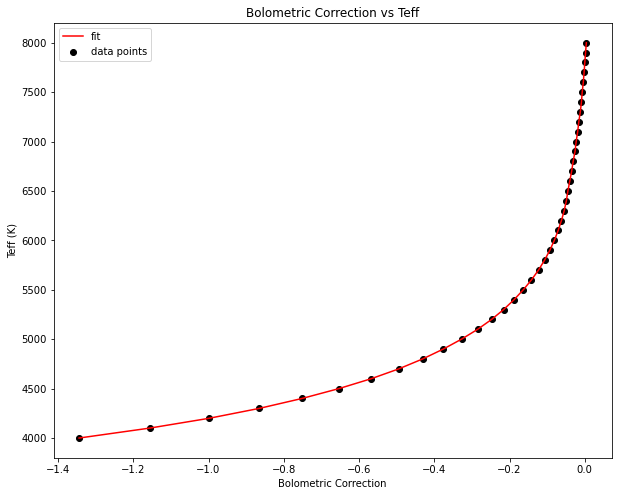

In [41]:
#plot the data points of the bolometric vs Teff relation along witht the spline fit
plt.figure(figsize=(10,8)) 

plt.scatter(BC, Teff, label = 'data points', color = 'k')
plt.plot(BC, spl(BC), color = 'r', label = 'fit')

plt.title('Bolometric Correction vs Teff')
plt.xlabel('Bolometric Correction')
plt.ylabel('Teff (K)')

plt.legend()
plt.show()

In [38]:
#since the absolute magnitude is much larger, the same number of values as the Teff and BC are selected to 
#cut this array 
abs_mag2 = abs_mag[:41]

The resulting equation from rearranging the first equation to solve for Luminosity using the given constant values as well as the ones from the dataset. 

$$
L = 10^{\Big( \frac{BC_\mathrm{Hp}(T_\mathrm{eff}) - M_\odot}{-2.5} \Big)} L_\odot
$$

In [43]:
#define the luminosity from rearranging the first given equation
def luminosity(teff,absmag,bc): 
    sum1 = absmag + (bc*teff) - M_solar
    ten = sum1 / (-2.5)
    L = 10**(ten) * L_solar
    return L

In [47]:
#apply the luminosity formula to the values of bolometric correction, effective temperature and absolute magnitude 
lum = []
for i in range(len(Teff)):
    l  = luminosity(Teff[i],abs_mag2[i],BC[i])
    lum = np.append(l,lum)

C:\Users\VANESSA\AppData\Local\Temp/ipykernel_12064/2972472944.py:4: RuntimeWarning: overflow encountered in double_scalars
  L = 10**(ten) * L_solar


In [62]:
lum

array([1.67344257e+015, 4.25305694e+022, 6.97193390e+025, 1.73918371e+034,
       6.92942726e+037, 7.41055251e+045, 2.33194350e+054, 8.42587419e+062,
       1.63799382e+075, 2.28411249e+082, 8.49164702e+091, 1.73883763e+099,
       1.43848218e+113, 8.26465089e+120, 3.01987046e+133, 1.57155698e+143,
       1.76047176e+154, 1.25734872e+165, 5.71911310e+179, 2.82870002e+200,
       4.78091298e+220, 2.41913884e+244, 8.28276327e+275,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf])

In [60]:
#the resulting luminosity array has as a result some infinite values that cant be plotted and thus must be cut 
lum[:23]

array([1.67344257e+015, 4.25305694e+022, 6.97193390e+025, 1.73918371e+034,
       6.92942726e+037, 7.41055251e+045, 2.33194350e+054, 8.42587419e+062,
       1.63799382e+075, 2.28411249e+082, 8.49164702e+091, 1.73883763e+099,
       1.43848218e+113, 8.26465089e+120, 3.01987046e+133, 1.57155698e+143,
       1.76047176e+154, 1.25734872e+165, 5.71911310e+179, 2.82870002e+200,
       4.78091298e+220, 2.41913884e+244, 8.28276327e+275])

Text(0.5, 1.0, '2D Histogram of B-V Color and Absolute Magnitude')

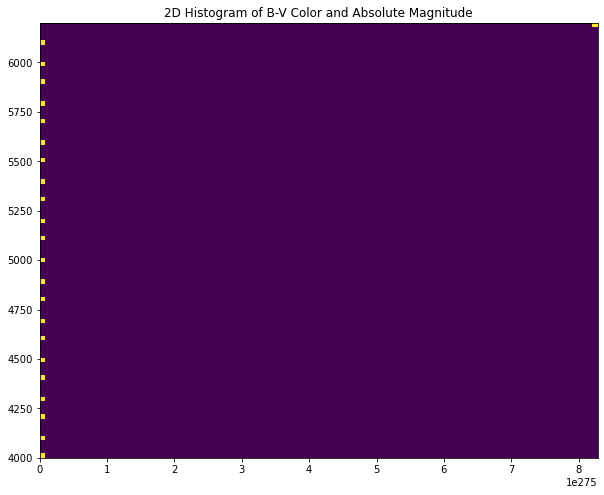

In [61]:
#a 2d histogram is plotted where the infinite values are exluded from the luminosity array and its corresponding
#teff values

plt.figure(figsize=(10,8)) 

plt.hist2d(lum[:23],Teff[:23], bins = 100)

plt.title('2D Histogram of B-V Color and Absolute Magnitude')

Now try to perform a linear fit to the main sequence, accounting for error. Estimate the error in the fit. **10 points**

Figure out how to isolate the stars on the main sequence. What is the probability for a star to be on the main sequence? Use the bootstrapping technique to determine the constrain the error in this approximation. **10 points**

The last two problems depend on the solution of the question, and since the resulting graph from this question does not resemble the HR diagram with a visible main sequence is not possible to either create a fit to this region and to isolate the stars in it. 